# 0. Introduction

## Goal

This notebook aims to present how data stored in non formatted documents could be leveraged to improve data quality inside the PIM.

This notebook uses a handful of modules developped inside this project.

## What pipeline?

The different steps for this project are as follows:

1. fetch all product IDs from PIM with the associated ingredient lists
- split the products between a train set and a test set
- train the algorithm on the train set: i.e. construct the vocabulary
- make it make prediction on the test set
- compare it with the ingredient list on this product

# 1. Fetching the data

We will use production data for training and testing of this model. The ID of the products are the PIM uid, and therefore are listed in the directory of the PIM-API module.

First, let's get those uids.

In [1]:
from src import pimapi
requester = pimapi.Requester('prd')
requester.refresh_directory()
requester._directory

Done


,type,title,lastModified,lastRefreshed,lastFetchedData,lastFetchedFiles
uid,,,,,,
58f67e91-6d16-4f12-97c7-e67d24be6805,pomProduct,Curcuma moulu en sac 1 kg LA CASE AUX EPICES,2019-12-06 11:24:21.231000+00:00,2020-02-04 20:20:07.493901+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
f46327cf-8f3c-4b67-85fa-7e6e6daaf618,pomProduct,Pique à viande bleu en sachet de 100 HIPPOPOTAMUS,2020-01-06 14:52:29.288000+00:00,2020-02-04 20:20:07.493901+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
58a1ae66-ca4d-4d82-9d30-4073b1edaeb8,pomProduct,Pique à viande rouge en sachet de 100 HIPPOPOT...,2020-01-06 14:52:48.715000+00:00,2020-02-04 20:20:07.493901+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
9bc59474-7839-458b-b56a-ba334fe4894b,pomProduct,Pique à viande noir en sachet de 100 HIPPOPOTAMUS,2020-01-06 14:53:00.627000+00:00,2020-02-04 20:20:07.493901+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
c97834e7-124e-4491-9f2a-3e4009fdda4e,pomProduct,Pique à viande marron en sachet de 100 HIPPOPO...,2020-01-06 14:53:12.375000+00:00,2020-02-04 20:20:07.493901+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
...,...,...,...,...,...,...
a9517205-d617-4871-ab69-d4fd3d5380a3,pomProduct,PAMPLEMOUSSE ROSE 20 CL VP PAGO,2020-02-04 08:32:36.501000+00:00,2020-02-04 20:20:07.493901+00:00,NaT,NaT
f443cc4b-4f0f-4aca-8138-59d92529e292,pomProduct,PURÉE POMME POIRE BIO BOÎTE 5/1 BIOVIVER,2020-02-04 13:27:23.196000+00:00,2020-02-04 20:20:07.493901+00:00,NaT,NaT
9e296f50-dbba-49f2-91d0-787653712415,pomProduct,RIZ LG ETUV SPE RISOTTO SAC 5KG VPAILLE,2020-02-04 15:12:48.260000+00:00,2020-02-04 20:20:07.493901+00:00,NaT,NaT


One can see the modification status of the product via the `modification_report` method:

In [4]:
requester.modification_report()

Number of items: 12864
Number of items with outdated data: 219
Number of items with outdated files: 219


The PIM uids of the products are the keys of the `directory` of our requester. We extract the ingredients associated with these uids.

In [5]:
requester.fetch_all_from_PIM(page_size=1000, max_page=-1, nx_properties='*')
requester.result[0].json()['entries'][0]

Done


{'entity-type': 'document',
 'repository': 'default',
 'uid': '9c7c134e-ce31-4f99-9fdc-fc65e30f6b4d',
 'path': '/default-domain/pomSupplierWorkspace/ANDROS/Sucettes_caramel_et_fruits_en_presentoir_de_250_PIERROT_GOURMAND',
 'type': 'pomProduct',
 'state': 'product.waiting.supplier.validation',
 'parentRef': 'd09234fb-7b08-492d-825f-c89ba5dfac57',
 'isCheckedOut': False,
 'isVersion': False,
 'isProxy': False,
 'changeToken': '25-0',
 'isTrashed': False,
 'title': 'Sucettes caramel et fruits en présentoir de 250 PIERROT GOURMAND',
 'lastModified': '2019-08-12T14:13:50.342Z',
 'properties': {'pprodc:ingredientsList': 'Sucettes caramel: LAIT frais, sucre, sirop de glucose, arôme, BEURRE, sel Sucettes fruits: Sirop de glucose, sucre, acidifiant: acide citrique, arômes',
  'pprodc:withoutPalmOil': 'non',
  'pprodc:withoutEDTA': None,
  'pprodc:withoutAdditive': 'non',
  'pprodc:eggFarmingMode': None,
  'pprodc:monoIngredient': False,
  'pprodc:withoutChlorine': None,
  'pprodc:activeIngredi

In [24]:
mapping = {'uid': 'uid', 'Libellé': 'title', 'Ingrédients': 'properties.pprodc:ingredientsList'}
df = requester.result_to_dataframe(record_path='entries', mapping=mapping, index='uid')
df

,Libellé,Ingrédients
uid,,
9c7c134e-ce31-4f99-9fdc-fc65e30f6b4d,Sucettes caramel et fruits en présentoir de 25...,"Sucettes caramel: LAIT frais, sucre, sirop de ..."
f3fb0863-eb63-4a31-82af-d8663bc14460,"Fourchette 16,5 cm champagne PLASTICO",None
9b234a3a-e1a0-4a63-b91c-7528e92f94ab,"Couteau 16,5 cm oxibio PLASTI",None
371646a0-04e8-4fb6-bf0c-dac7896f173b,"Cuillère oxibio 16,5 cm PLASTI",None
122576b5-d45d-41e1-b8bf-a070b13a062f,Boisson citron-citron vert en bouteille verre ...,"Eau, jus à base de concentrés de : citron (8,5..."
...,...,...
c9c05f33-afc1-4b78-8391-2bcba74887a7,Garniture pâtissière à froid en sac 2.5 kg COM...,"Sucre, amidon modifié, poudre de LACTOSERUM, m..."
b7c1f419-6b98-4787-88ea-f2dfdbb345ea,"Sun muffin en sac 2,5 kg COMPLET","Sucre, farine de FROMENT, amidon de FROMENT, a..."
d9887a2e-b463-4329-9eb1-60839a21ba42,"Cookie en sac 2,5 kg COMPLET","Farine de FROMENT, sucre, poudres à lever : (E..."


# 2. Train / Test split

We will separate our data into a train test and a test set of equal sizes.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.5, random_state=42)

In [26]:
print(len(X_train))
X_train.iloc[:10]

6432


,Libellé,Ingrédients
uid,,
eb5bb1e3-0a86-46cb-9d76-3a965cf20c4b,1883 KIWI 100 CL,"Sucre de canne, eau, jus de kiwi à base de con..."
7416ffdb-b251-44ec-857d-f8d9557339a7,Haricot beurre fin en boîte 5/1 VALFRAY,"Haricots beurre, eau, sel."
ec3a80cb-e17c-4fc0-8aff-c8c59eb81a0b,SUMAC EN SACHET 500 G TERRE EXOTIQUE,Sumac en poudre
50ba185a-05f9-4d79-9652-d574e02cbe18,Bouchons d'oreille de rechange en boîte de 50 ...,None
552b6f32-a9bf-4697-a6b3-7a33142d22c8,Sac à sandwich blanc-bleu en colis de 1000 SPO...,None
46d8dc72-d607-4c66-b574-59205486f64e,POMME HVE POT PLST,None
ad0736a0-f40c-4a79-91fd-8d776783d852,CONFIT COQUELICOT DE NEMOURS,"sucre, Coquelicots sauvages de la région de Ne..."
4627f58f-cc7f-428c-9d0e-e5cbdcd8e535,Cure-dents en boîte de 1000 GARCIA DE POU,None
16a3db7d-be66-43b3-915f-b77b99812d46,MORILLE SÉCHÉE SPÉCIALE TUBO 500G DELICES DES ...,"100% morille (Morchella esculenta, conica)"


In [27]:
print(len(X_test))
X_test.iloc[:10]

6432


,Libellé,Ingrédients
uid,,
4482243f-bec3-4e8a-a1f2-1ed5bfc7b7ae,3D's Bugles goût fromage en sachet 85 g BENENUTS,"Farine de mais, huile de tournesol, base aroma..."
58a92b0c-8387-410e-ae49-c8d227e7c0cb,Pauillac rouge AOC 2012 en bouteille 75 cl TER...,Allergènes : SULFITES
3509044e-db56-434e-93f8-9e2f541410ec,Pain d'épices toast finement poivré en paquet ...,"Sirop de glucose-fructose, farine de SEIGLE, c..."
0b578035-f4b8-4cc9-9368-1ee8adf05501,Feuille de biscuit cuiller saveur café épaisse...,"Sucre, farine de BLE, OEUFS frais (32,9%), sir..."
24a33c96-b509-46f0-88e7-1d3e9373d1ab,PURÉE AUX NAVETS SANS SEL AJOUTÉ EN SACHET 1 K...,"Pommes de terre 59,5 % - Navets 40 % - Amidon ..."
630ddc1b-ad3a-4b5b-bdfd-c075b07aafac,Jacquère de Savoie blanc AOC en bouteille 75 c...,vin (SULFITE)
92be0cba-56ca-4229-ba3a-a0734a414f2a,TASKI SANI 4 EN 1 DÉTERGENT DÉTARTRANT DÉSINFE...,None
49178cad-d2a5-4680-ab88-dfb0953ad48c,Coulis de fruits rouges en poche 1 kg LEONCE B...,"Fruits rouges 84.8%, (fraise, framboise, griot..."
b4155071-8aa8-434c-b13c-30ee9e81d70b,Arôme naturel de truffe en bouteille 115 ml SE...,"Préparations aromatisantes, substances aromati..."


# 3. Constructing the vocabulary

We will now use bag-of-words related functionalities of scikit-learn to construct our vocabulary.

## 3.1 Removing `None` values

First step is to remove `None` values from ingredient lists to make our count of words.

In [29]:
import pandas as pd
print(f'None values before replacement in X_train: {sum(pd.isna(X_train["Ingrédients"]))}')
X_train.loc[:, 'Ingrédients'].fillna('', inplace=True)
print(f'None values after replacement in X_train: {sum(pd.isna(X_train["Ingrédients"]))}')
print(f'None values before replacement in X_test: {sum(pd.isna(X_test["Ingrédients"]))}')
X_test.loc[:, 'Ingrédients'].fillna('', inplace=True)
print(f'None values after replacement in X_train: {sum(pd.isna(X_test["Ingrédients"]))}')

None values before replacement in X_train: 0
None values after replacement in X_train: 0
None values before replacement in X_test: 1704
None values after replacement in X_train: 0


## 3.2 Parsing the corpus

We now parse our ingredient lists, with a naive approach (no stop words, no preprocessing, ...).

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.loc[:, 'Ingrédients'])

We can see that we know have a matrix with as much rows as the number of products in our train corpus, and as much columns as the number of different words in their ingredient lists.

In [31]:
X_train_counts.shape

(6432, 3193)

The vocabulary has been computed: 

In [32]:
print(f'The vocabulary length is {len(count_vect.vocabulary_)}')
count_vect.vocabulary_

The vocabulary length is 3193


{'sucre': 2811,
 'de': 1065,
 'canne': 684,
 'eau': 1361,
 'jus': 1854,
 'kiwi': 1875,
 'base': 519,
 'concentrés': 908,
 '10': 26,
 'acidifiant': 282,
 'acide': 272,
 'citrique': 840,
 'arômes': 455,
 'colorant': 873,
 'e102': 1199,
 'e133': 1210,
 'haricots': 1740,
 'beurre': 540,
 'sel': 2720,
 'sumac': 2830,
 'en': 1380,
 'poudre': 2442,
 'coquelicots': 946,
 'sauvages': 2707,
 'la': 1881,
 'région': 2642,
 'nemours': 2185,
 'purée': 2520,
 'pétales': 2535,
 'arôme': 454,
 'min': 2077,
 '100': 27,
 'morille': 2118,
 'morchella': 2117,
 'esculenta': 1423,
 'conica': 923,
 'semoule': 2724,
 'ble': 578,
 'dur': 1164,
 'fine': 1499,
 'blanche': 571,
 'épinards': 3164,
 'tomates': 2914,
 'issu': 1829,
 'agriculture': 325,
 'biologique': 555,
 'vin': 3050,
 'madère': 1988,
 'dont': 1146,
 'sulfites': 2825,
 'amidon': 370,
 'modifié': 2092,
 'maïs': 2049,
 'tomate': 2913,
 'concentré': 904,
 'protéines': 2486,
 'lait': 1892,
 'fumée': 1574,
 'exhausteur': 1449,
 'goût': 1678,
 'glutamate'

We can print out the top 10 most frequent words in our ingredient lists:

In [33]:
word_counts = X_train_counts.sum(axis=0)
word_counts2 = [(word, word_counts[0, idx]) for word, idx in count_vect.vocabulary_.items()]
word_counts2.sort(key=lambda x: x[1], reverse=True)
word_counts = word_counts2
word_counts[:10]

[('de', 14611),
 ('sucre', 2907),
 ('sel', 2206),
 ('acide', 1988),
 ('eau', 1791),
 ('lait', 1463),
 ('arôme', 1387),
 ('huile', 1380),
 ('poudre', 1361),
 ('sirop', 1250)]

# 4. First analysis of a single document

## 4.1 Parsing a doc from the test set

First, we use a function that parses a document from the disk from its product uid and returns a list of strings. For illustration, we choose one of the products in our test set.

In [34]:
X_test.iloc[:10]

,Libellé,Ingrédients
uid,,
4482243f-bec3-4e8a-a1f2-1ed5bfc7b7ae,3D's Bugles goût fromage en sachet 85 g BENENUTS,"Farine de mais, huile de tournesol, base aroma..."
58a92b0c-8387-410e-ae49-c8d227e7c0cb,Pauillac rouge AOC 2012 en bouteille 75 cl TER...,Allergènes : SULFITES
3509044e-db56-434e-93f8-9e2f541410ec,Pain d'épices toast finement poivré en paquet ...,"Sirop de glucose-fructose, farine de SEIGLE, c..."
0b578035-f4b8-4cc9-9368-1ee8adf05501,Feuille de biscuit cuiller saveur café épaisse...,"Sucre, farine de BLE, OEUFS frais (32,9%), sir..."
24a33c96-b509-46f0-88e7-1d3e9373d1ab,PURÉE AUX NAVETS SANS SEL AJOUTÉ EN SACHET 1 K...,"Pommes de terre 59,5 % - Navets 40 % - Amidon ..."
630ddc1b-ad3a-4b5b-bdfd-c075b07aafac,Jacquère de Savoie blanc AOC en bouteille 75 c...,vin (SULFITE)
92be0cba-56ca-4229-ba3a-a0734a414f2a,TASKI SANI 4 EN 1 DÉTERGENT DÉTARTRANT DÉSINFE...,
49178cad-d2a5-4680-ab88-dfb0953ad48c,Coulis de fruits rouges en poche 1 kg LEONCE B...,"Fruits rouges 84.8%, (fraise, framboise, griot..."
b4155071-8aa8-434c-b13c-30ee9e81d70b,Arôme naturel de truffe en bouteille 115 ml SE...,"Préparations aromatisantes, substances aromati..."


In [35]:
from src.pimpdf import PDFDecoder
import os

# This uid has been gotten from the previous cell, maybe from a previous run!
uid = '776613db-a461-44e1-ab6a-1344ac6ae99c'
test_doc_blocks = PDFDecoder.path_to_blocks(os.path.join('.', 'dumps', 'prd', uid, 'FTF.pdf'))
print(f'Number of blocks in this document: {len(test_doc_blocks)}')
test_doc_blocks

Number of blocks in this document: 42


['FICHE DE SPECIFICATIONS',
 "DELIR' PIK (avec violet)",
 'ANNEXE 02207B\ndate:10/06/2015',
 'HACCP',
 "Définition et procédé d'obtention :",
 "Assortiment d'articles de confiserie, gélifiés, souples, colorés, pour certains composés de deux couches (une \ntranslucide colorée et une opaque blanche), enrobés de sucre acidifié, obtenus par la technique de coulée d'un sirop \nrésultant de la dissolution de sucres et gélatine (foisonné pour la couche opaque) dans des empreintes d'amidon natif \nde maïs leur conférant des formes originales qui après gélification et séchage, sont démoulés, dépoudrés et enrobés \nde sucre acidifié.",
 'Dénomination :',
 'confiserie gélifiée acidifiée',
 'Composition :',
 "Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: \ncire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de \nplantes: citron, carthame, spiruline, patate dou

For this specific document (*776613db-a461-44e1-ab6a-1344ac6ae99c*), the correct block of text is:

    Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: cire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis; sirop de sucre inverti; colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.

The index of this correct block is *9* in our block list.

In [36]:
true_idx = 9

We will now parse these blocks with the vocabulary computed from our train set. We reuse the `CountVectorizer` we trained before, but take care just to use the `transform` method.

Using the `fit_transform` method would retrain the model with the current blocks of text.

In [37]:
test_doc_counts = count_vect.transform(test_doc_blocks)
test_doc_counts

<42x3193 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

## 4.2 Getting some insights from this first analysis

We can compute and draw the terms counts for our blocks: 

In [38]:
import numpy as np

term_counts = np.ravel(test_doc_counts.sum(axis=1))
term_counts

array([ 1,  2,  2,  0,  1, 41,  0,  1,  1, 50,  0,  0, 10,  1,  2,  3,  0,
        2,  2,  0,  0,  5,  2,  2,  1,  2,  0,  1,  3,  0,  1,  5, 12,  4,
        0,  3,  5,  1, 16,  2, 11,  0], dtype=int64)

We can see that the *true* ingredient list has the higher term_count. However, term counts alone are likely to have a biais toward long blocks, so we can also compute a term frequency.

We will instantiate a new count_vectorizer, for the sole purpose of counting tokens in the blocks.

In [40]:
blocks_word_counts = np.ravel(CountVectorizer().fit_transform(test_doc_blocks).todense().sum(axis=1))
blocks_word_counts

array([ 3,  4,  6,  1,  4, 70,  1,  3,  1, 50,  3,  1, 14,  5,  2,  4,  1,
        2,  2,  2,  4,  5,  2,  2,  2,  3,  4,  6,  8,  0,  1, 10, 22, 10,
        1,  8, 17,  2, 20,  3, 20,  0], dtype=int64)

We can now compute the frequencies of "ingredient words" in the blocks of this document.

In [41]:
term_freqs = np.divide(term_counts, blocks_word_counts, where=blocks_word_counts!=0)
term_freqs

array([0.33333333, 0.5       , 0.33333333, 0.        , 0.25      ,
       0.58571429, 0.        , 0.33333333, 1.        , 1.        ,
       0.        , 0.        , 0.71428571, 0.2       , 1.        ,
       0.75      , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.5       ,
       0.66666667, 0.        , 0.16666667, 0.375     , 0.        ,
       1.        , 0.5       , 0.54545455, 0.4       , 0.        ,
       0.375     , 0.29411765, 0.5       , 0.8       , 0.66666667,
       0.55      , 0.        ])

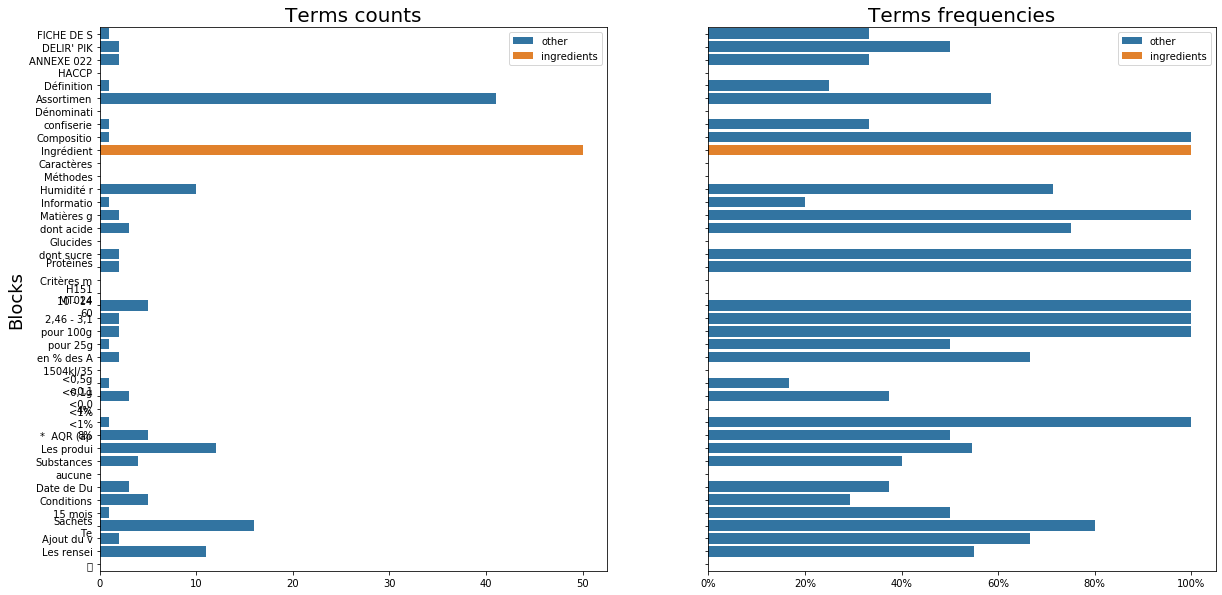

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

colors = ['other'] * len(test_doc_blocks)
colors[true_idx] = 'ingredients'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
sns.barplot(ax=ax[0], x=term_counts, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
sns.barplot(ax=ax[1], x=term_freqs, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
ax[0].set_title('Terms counts', fontsize=20)
ax[0].set_ylabel('Blocks', fontsize=18)
ax[1].set_title('Terms frequencies', fontsize=20)
ax[1].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
pass

We can see that some very short texts also have an "ingredient word frequency" equal to 100%.

We can draw a scatter plot of these indicators:

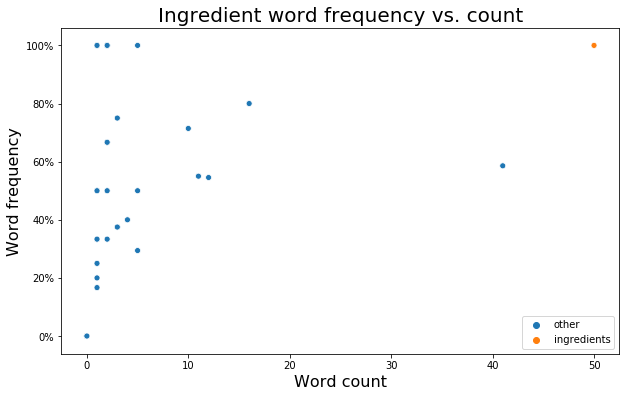

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.scatterplot(ax=ax, x=term_counts, y=term_freqs, hue=colors)
ax.set_title('Ingredient word frequency vs. count', fontsize=20)
ax.set_xlabel('Word count', fontsize=16)
ax.set_ylabel('Word frequency', fontsize=16)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
pass

As expected, the correct ingredient list is in the top right quadrant of this representation. Should all cases yield results as sharply contrasted, we will have no difficulty in constructing an accurate functionality!

## 4.3 A difficulty arises in assessing ground truth for model validation

### Long strings are seldom strictly equal

We can compare the document ingredient list, with the one stored in the PIM system:

In [46]:
test_doc_blocks[true_idx].replace('\n', '') == df.loc[uid, "Ingrédients"]

False

Because a great deal of the current data in the PIM system has (at least once!) been manually keyed in, it is very likely that there will be an arguably high ratio of mistakes.

In [47]:
print('From pdf file: ')
print(test_doc_blocks[true_idx])
print('--------------------------------------------------------------------------------------')
print('From PIM system:')
print(df.loc[uid, "Ingrédients"])

From pdf file: 
Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: 
cire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de 
plantes: citron, carthame, spiruline, patate douce, radis; sirop de sucre inverti; colorants: carmins, bleu patenté V, 
carotènes végétaux, lutéine, anthocyanes.
--------------------------------------------------------------------------------------
From PIM system:
Ingrédients: sirop de glucose, sucre, gélatine, dextrose, acidifiants: acide citrique, acide malique, agent d'enrobage: cire de carnauba, correcteurs d'acidité: citrate tricalcique, malate acide de sodium, arôme, concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis, sirop de sucre inverti, colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.


One can see that although very close, those 2 texts are somewhat different, from the punctuation marks.

### Comparison between PIM system *ground truth* with documents content

TODO !!!

## Different strategies

TODO !!!

But The similarity between the ground truth (the pdf file) and the content of the PIM system can be measured via the [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). This distance is the number of character insertions, deletions or substitutions to get from one text to the other.

If we compute this distance between the pdf file block and the PIM system content we get:

In [60]:
import jellyfish
dist = jellyfish.levenshtein_distance(test_doc_blocks[true_idx].replace('\n', ''),
                                      df.loc[uid, "Ingrédients"])
print(f'Levenshtein distance between pdf file and PIM system content is: {dist}')

Levenshtein distance between pdf file and PIM system content is: 11


We can compute this distance for each block in our pdf file, and plot it in a bar graph:

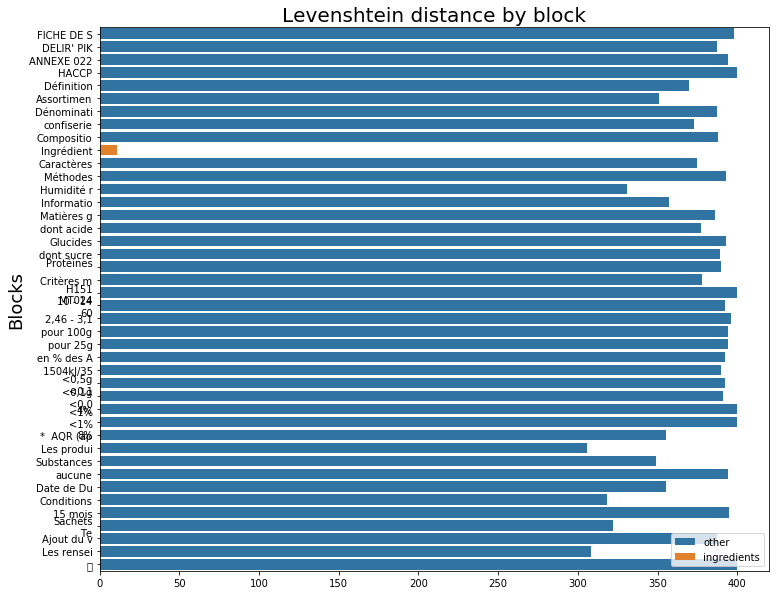

In [62]:
distances = list(map(lambda x:jellyfish.levenshtein_distance(x.replace('\n', ''), df.loc[uid, "Ingrédients"]),
                 test_doc_blocks))
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(ax=ax, x=distances, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
ax.set_title('Levenshtein distance by block', fontsize=20)
ax.set_ylabel('Blocks', fontsize=18)
pass

## 4.2 Making prediction on a document